# Telco Customer Churn Classification

## Problem Statement
In the telecom industry, customer retention is critical as high churn rates directly impact revenue. Customers often judge service providers based on a single experience, making service quality and reliability paramount. Churn analysis helps companies identify reasons for customer attrition and develop strategies to improve service, enhance customer satisfaction, and reduce churn. Predictive models and churn analysis reports are vital for fostering customer loyalty and driving growth.

## Aim 
Build binary classification mode to indetify potential churn customers.

## Notebook Contents
* Dataset Description
* Exploratory Data Analysis (EDA)
* Feature Engineering
* Modeling
* Conclusion

## Dataset Description:
For this problem we will use the Telco Customer Churn kaggle dataset. It contains customer information, including demographics, services subscribed, account details, and churn status.

The dataset includes the following attributes:

- **customerID**: Unique identifier for the customer.  
- **gender**: Gender of the customer (Male/Female).  
- **SeniorCitizen**: Indicates whether the customer is a senior citizen (1 for Yes, 0 for No).  
- **Partner**: Indicates if the customer has a partner (Yes/No).  
- **Dependents**: Indicates if the customer has dependents (Yes/No).  
- **tenure**: Number of months the customer has stayed with the company.  
- **PhoneService**: Indicates if the customer has phone service (Yes/No).  
- **MultipleLines**: Indicates if the customer has multiple lines (Yes/No/No phone service).  
- **InternetService**: Type of internet service provider (DSL/Fiber optic/No).  
- **OnlineSecurity**: Indicates if the customer has online security (Yes/No/No internet service).  
- **OnlineBackup**: Indicates if the customer has online backup (Yes/No/No internet service).  
- **DeviceProtection**: Indicates if the customer has device protection (Yes/No/No internet service).  
- **TechSupport**: Indicates if the customer has tech support (Yes/No/No internet service).  
- **StreamingTV**: Indicates if the customer has streaming TV (Yes/No/No internet service).  
- **StreamingMovies**: Indicates if the customer has streaming movies (Yes/No/No internet service).  
- **Contract**: Type of contract term (Month-to-month/One year/Two year).  
- **PaperlessBilling**: Indicates if the customer has paperless billing (Yes/No).  
- **PaymentMethod**: Customer’s payment method (Electronic check/Mailed check/Bank transfer (automatic)/Credit card (automatic)).  
- **MonthlyCharges**: Monthly charges incurred by the customer.  
- **TotalCharges**: Total charges incurred by the customer.  
- **Churn**: Target variable indicating whether the customer churned (Yes/No).  


## Exploratory Data Analysis (EDA)
For this part, we will follow these steps:
* Load the data.
* Check for data types, null values and handle them.
* Check corrections with target
* Check the distribution of different features with respect to the target

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')

In [94]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [95]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [96]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

The `TotalCharges` should int but for some reason it's a string,we will convert to numeric type and see.


In [97]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see this feature got some null values that why it is object.

In [98]:
df[df.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


When `TotalCharges` is null, all `tenure` values are zero, so it is acceptable to drop these rows since they are few in number.

In [99]:
df.dropna(inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Before we start the exploration part it is important to transform the categorical features,then we will check for the correlation.from sklearn.preprocessing import LabelEncoder


In [100]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_encoded = df.copy()

# Drop the 'customerID' column
df_encoded = df_encoded.drop(columns=['customerID'])

# Identify categorical columns
cat_features = df_encoded.select_dtypes(include=['object']).columns

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical feature
for f in cat_features:
    df_encoded[f] = le.fit_transform(df_encoded[f])

# Display the first few rows of the encoded DataFrame
df_encoded.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


<Axes: >

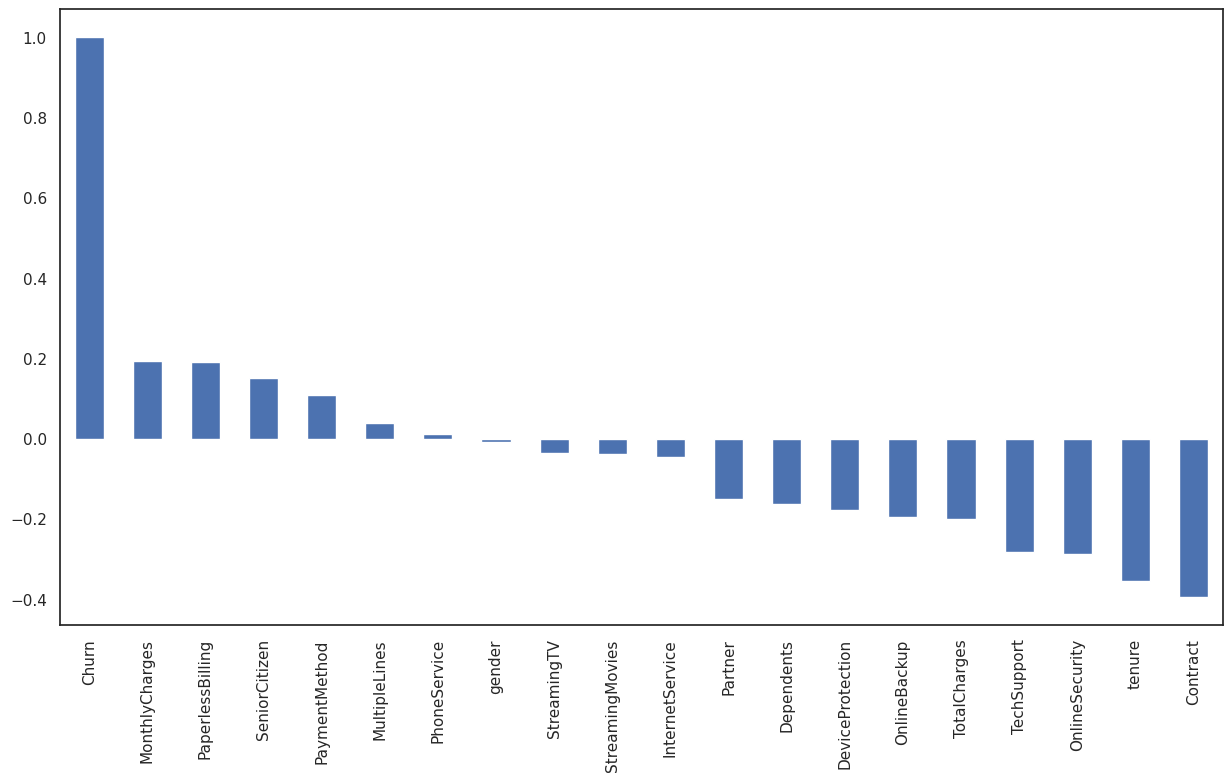

In [101]:
plt.figure(figsize=(15,8))
df_encoded.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

As we can see Month to month contracts,PaperlessBilling and SeniorCitizen seem to be positively correlated with churn. While, tenure, two year contracts, online security and tech support seem to be negatively correlated with churn.
We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

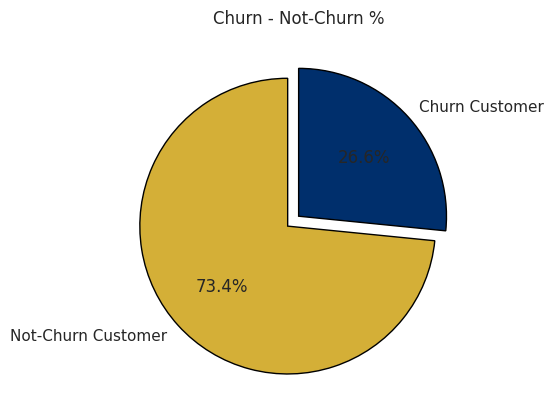

In [102]:
colors = ['#D4AF37', '#002F6C'] 
l = list(df.Churn.value_counts())
circle = [l[0]/sum(l)*100,l[1]/sum(l)*100]
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,colors=colors,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %');

The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers, this will  make the predictions biased towards Not-Churn customers.

Now we will see the distribution of several features with respect to the target. To do so, we will explore the categorical features based on three types: Demographics, Services and payments.

In [103]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Demographics Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

### **Demographics** ¶

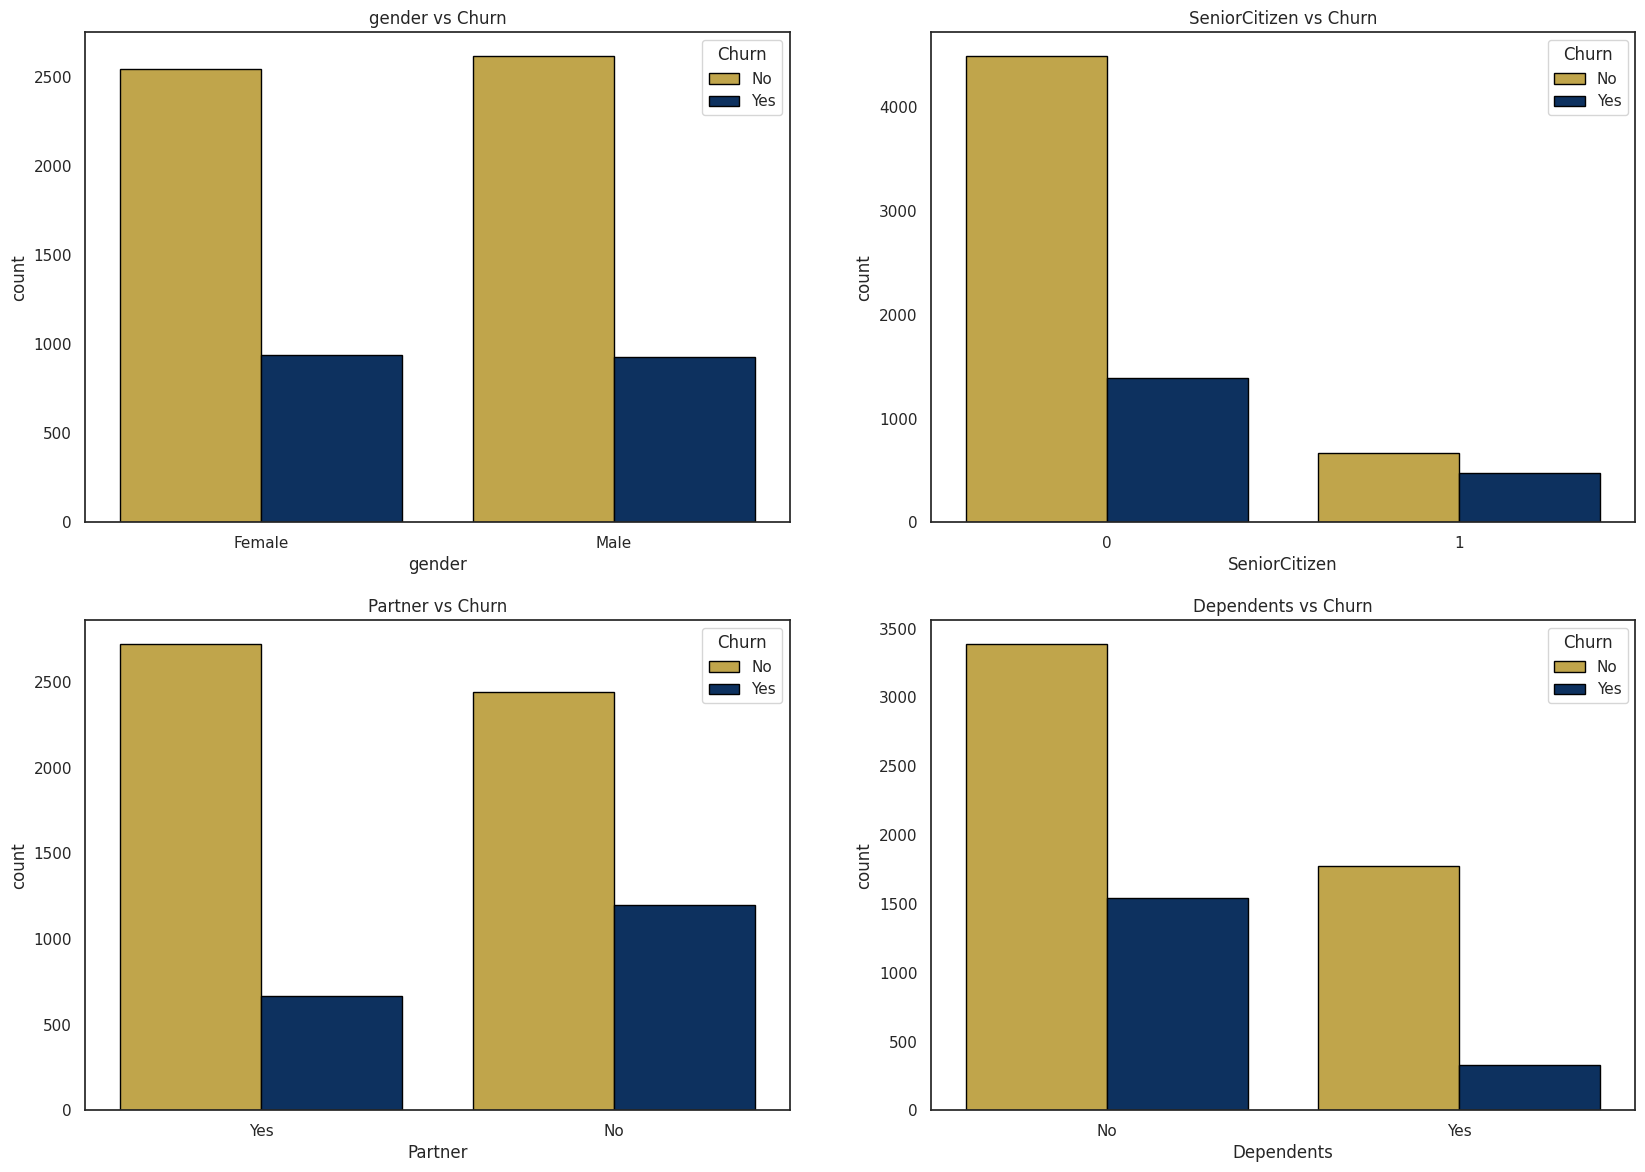

In [104]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l1)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=l1[i], data=df, hue="Churn", edgecolor='black',palette=colors)
    title = l1[i] + ' vs Churn'
    plt.title(title)

### Insights:

1. **Gender and Churn:** Male and female customers show similar churn rates.  
2. **Senior Citizens:** Senior citizens constitute a small proportion of customers,but we can observe a near about 40% churn of SeniorCitizen customers.
3. **Partners and Churn:** Customers living with a partner are less likely to churn compared to those without a partner.  
4. **Dependents and Churn:** Churn rates are higher among customers without dependents.


### **Services**

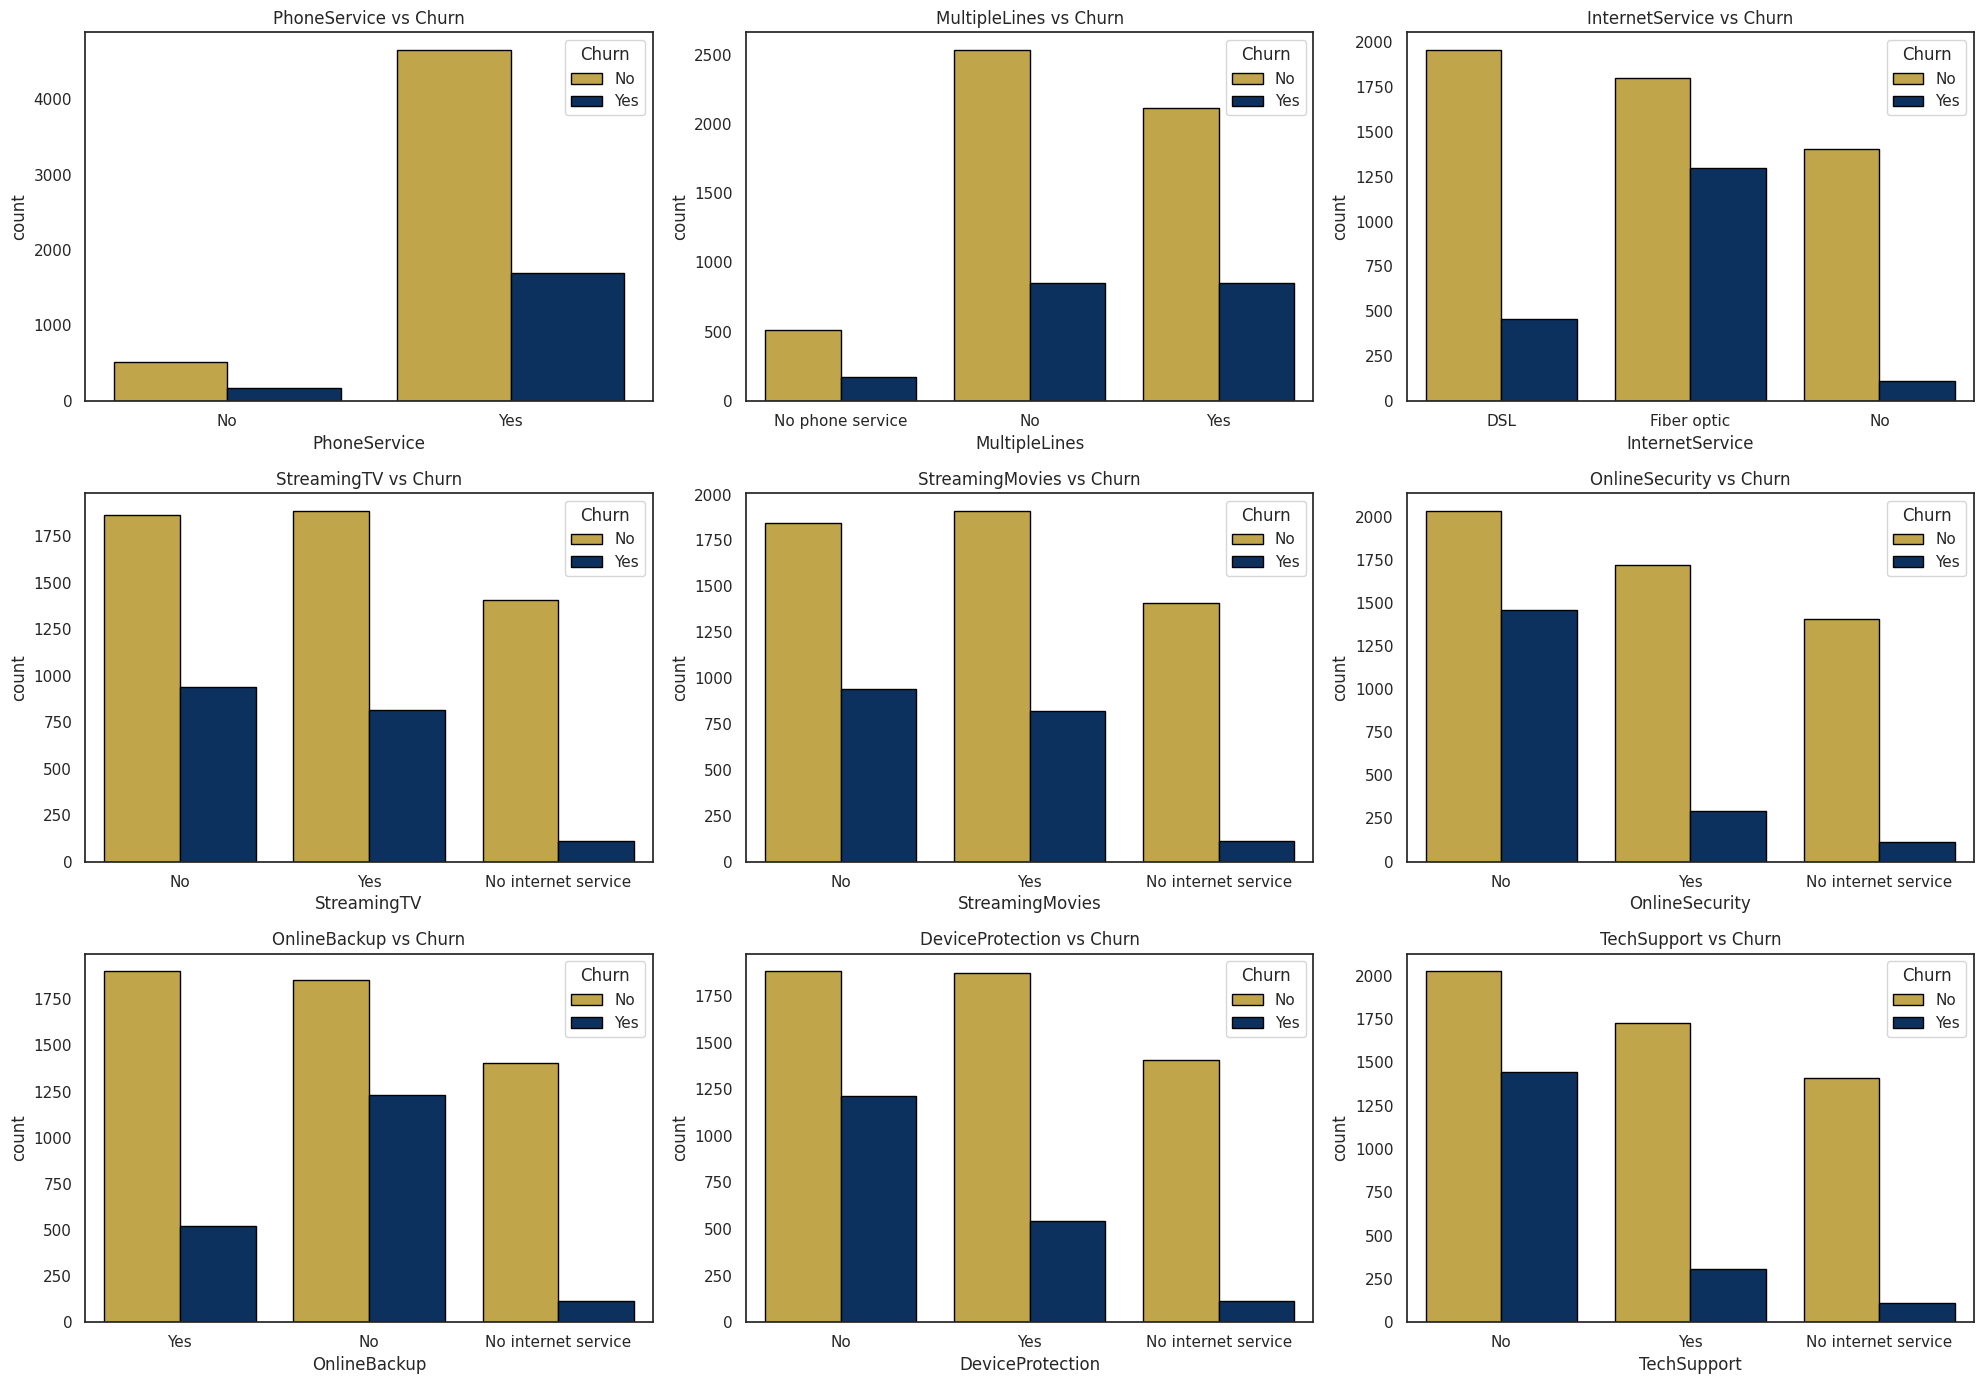

In [105]:
fig = plt.subplots(nrows = 3,ncols = 3,figsize = (20,14))
for i in range(len(l2)):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x=l2[i], data=df, hue="Churn", edgecolor='black',palette=colors)
    title = l2[i] + ' vs Churn'
    plt.tight_layout()
    plt.title(title)

### Insights:

1. **Internet Service Preferences:** Many customers resist Fiber optic internet, favoring DSL instead.  
2. **Streaming Services:** Churn rates are high regardless of whether customers subscribe to StreamingTV or StreamingMovies, suggesting these features are not the primary drivers of churn.  
3. **Crucial Services:** Poor performance in features like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport leads to a significant number of customers switching providers, highlighting the importance of these services in retaining customers.


### **payments**

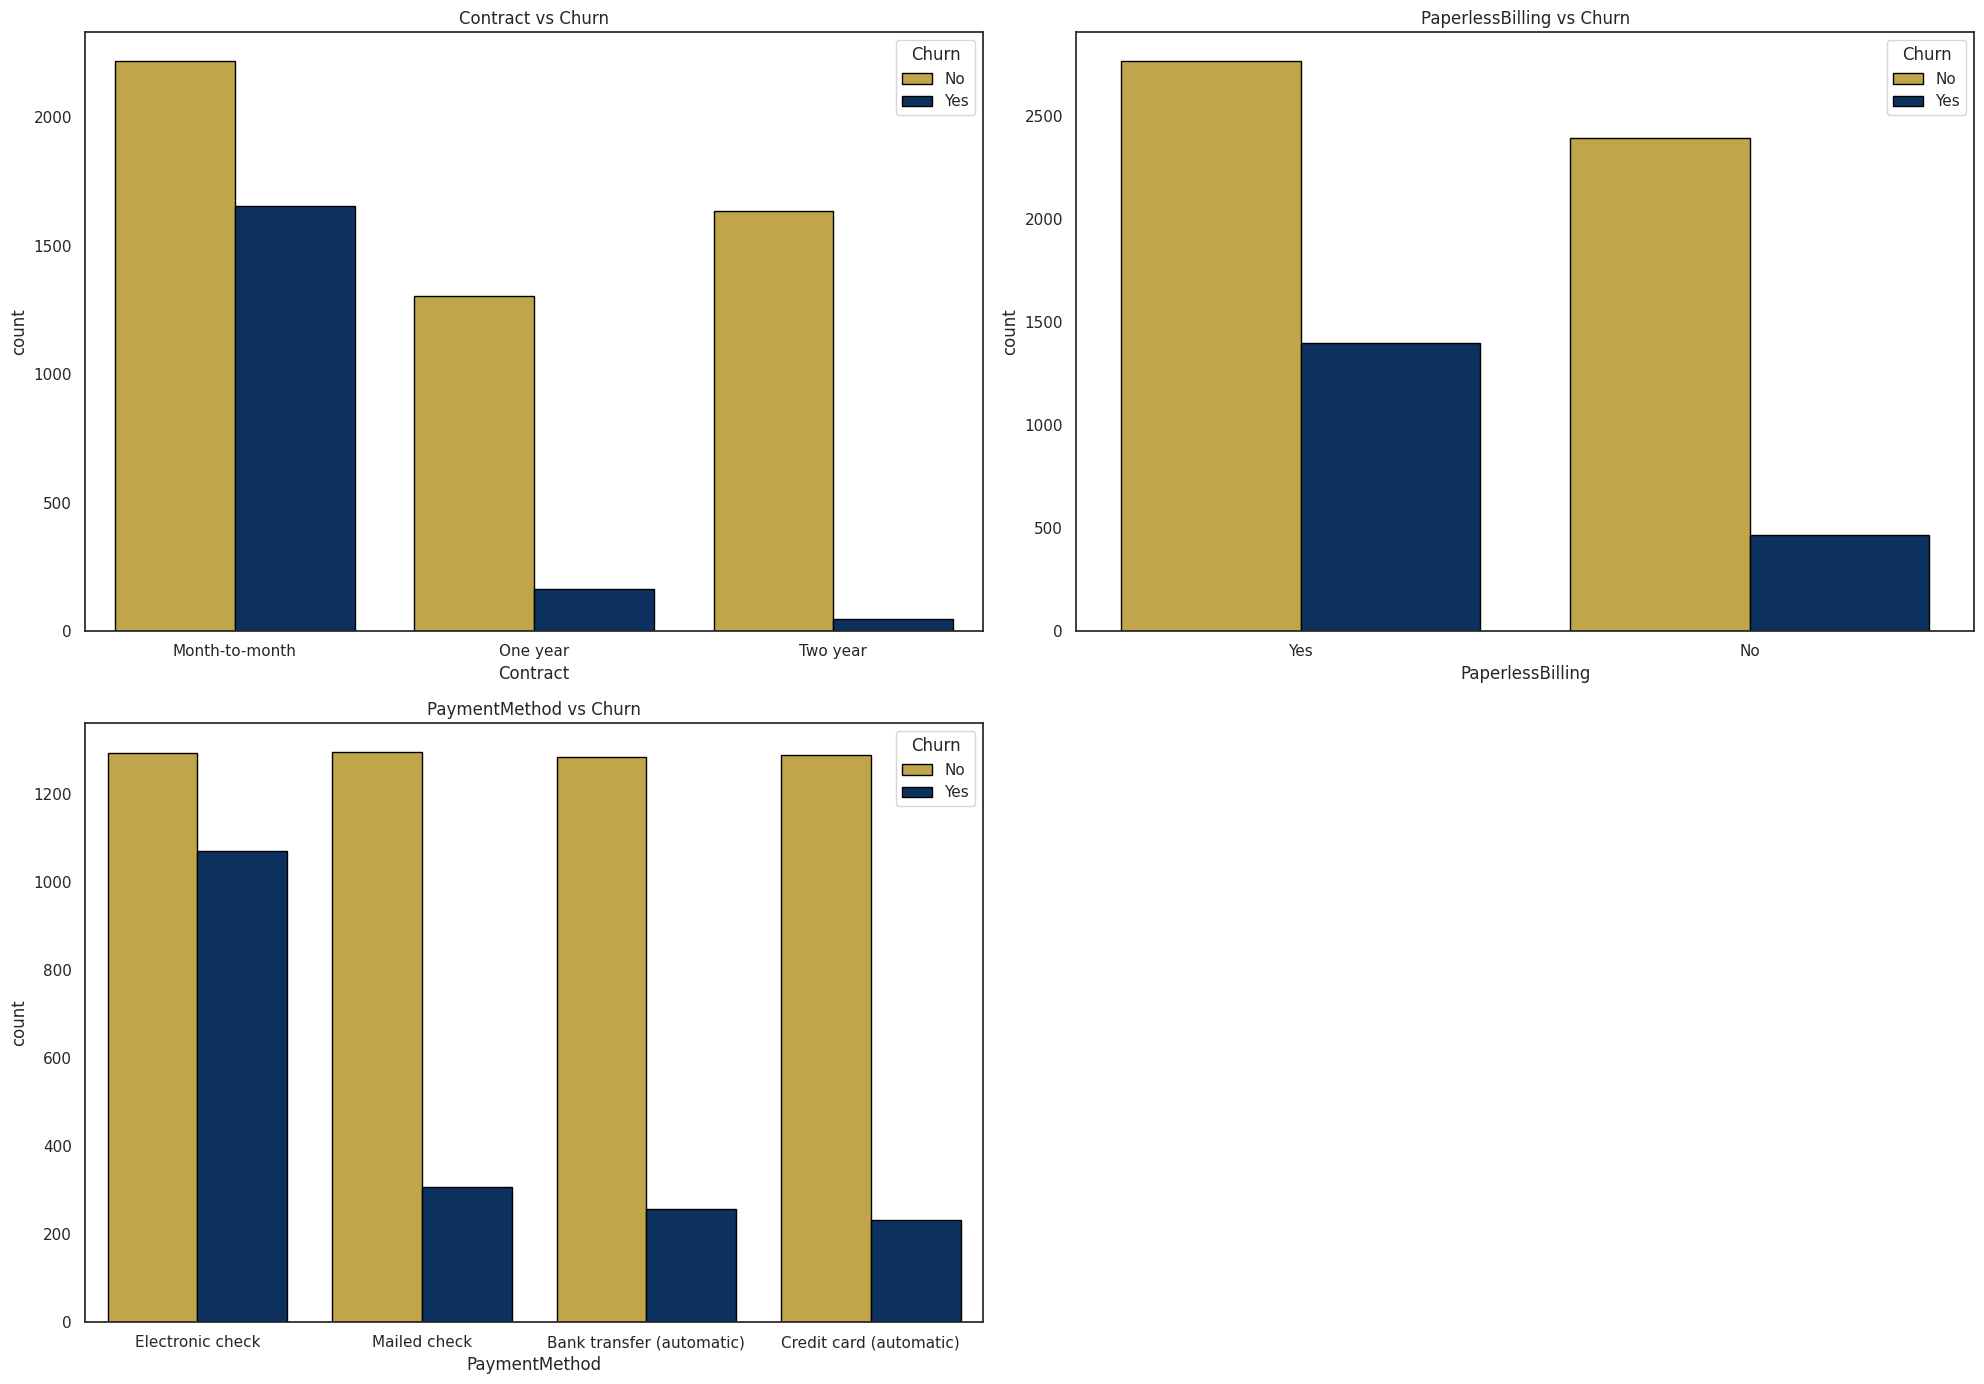

In [106]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 14))

# Flatten axes and loop through the first three features in l3
axes = axes.flatten()
for i in range(3):
    sns.countplot(ax=axes[i], x=l3[i], data=df, hue="Churn", edgecolor='black', palette=colors)
    title = l3[i] + ' vs Churn'
    axes[i].set_title(title)

# Hide the fourth subplot
axes[3].set_visible(False)

plt.tight_layout()
plt.show()


### Insights:

- **Month-to-Month Contracts**: High churn is likely due to customers testing services with short-term contracts, looking for cost-effective options.

- **Paperless Billing**: High churn among paperless billing users could indicate issues with payments or receipts, pointing to potential problems in the billing process.

- **Electronic Check Payment Method**: 1071 out of 2365 customers who paid via electronic check churned, suggesting dissatisfaction. The company should either improve this method or consider discontinuing it.


Now let's look at the numerical features. 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


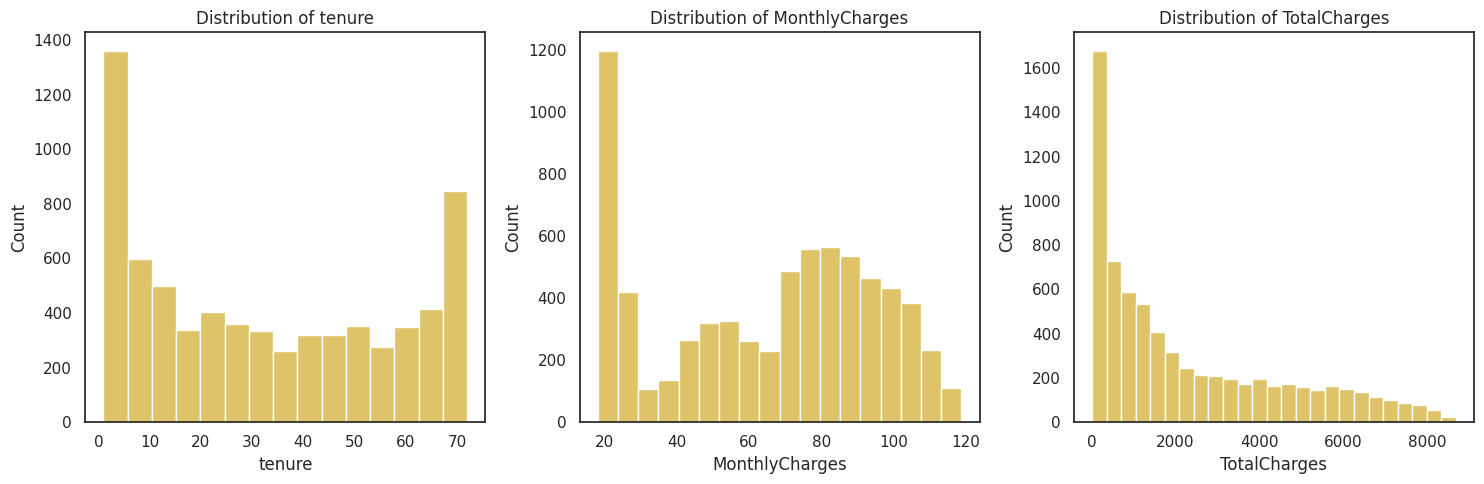

In [107]:
numeric_features = list(df.select_dtypes(include=['number']).drop(columns=['SeniorCitizen']).columns)
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numeric_features)):
    plt.subplot(1,3,i+1)
    sns.histplot(df[numeric_features[i]],color=colors[0])
    title = 'Distribution of ' + numeric_features[i]
    plt.title(title)
    plt.tight_layout()
plt.show()

The **tenure** and **MonthlyCharges** features display a **bimodal distribution** with peaks at **0-70** and **20-80**, while **TotalCharges** shows a **positively skewed distribution**.These features are also at different scales, so it's important to make them in single scale before training.


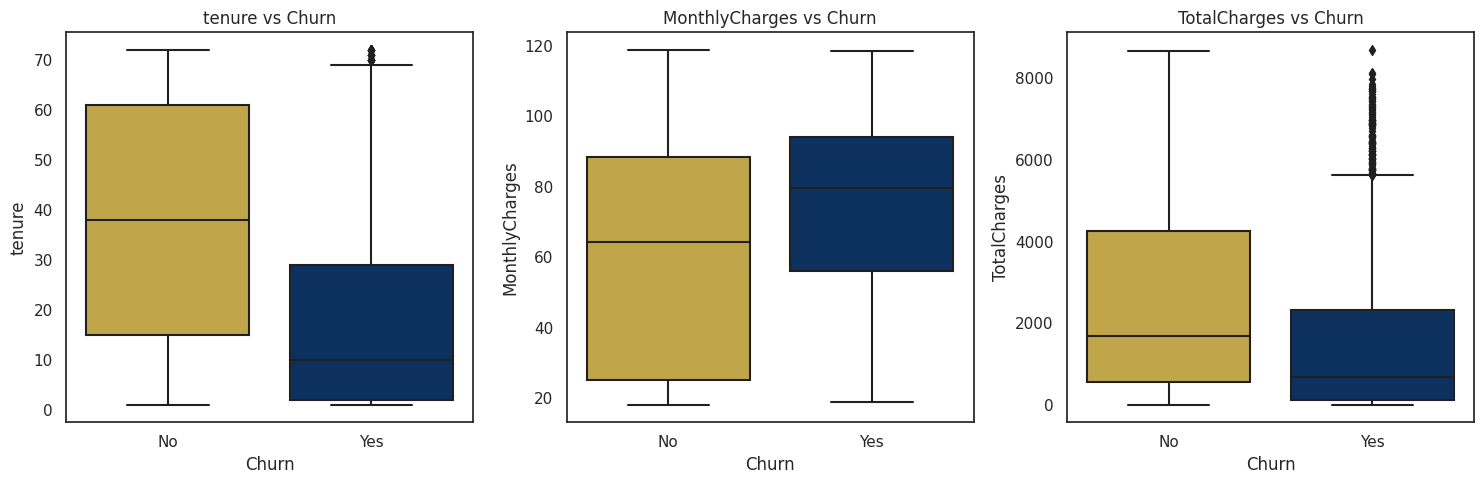

In [108]:
numeric_features = list(df.select_dtypes(include=['number']).drop(columns=['SeniorCitizen']).columns)
fig, ax = plt.subplots(nrows = 1,ncols = 3,figsize = (15,5))
for i in range(len(numeric_features)):
    plt.subplot(1,3,i+1)
    sns.boxplot(x = 'Churn',y = numeric_features[i],data = df,palette = colors)
    title = numeric_features[i] + ' vs Churn'
    ax[i].set_title(title)
    plt.tight_layout()
plt.show()

1. **Tenure**: Customers with longer tenures are less likely to churn, while newer customers tend to have higher churn rates.
   
2. **Monthly Charges**: Customers with higher monthly charges are more likely to churn compared to those with lower charges.

3. **Total Charges**: Non-churned customers have higher total charges, reflecting their longer association with the company.


## Summary:
- The dataset has a 3:1 ratio of Not-Churn to Churn customers, which could bias predictions toward Not-Churn.

- Higher churn rates are observed among customers on month-to-month contracts, likely due to the flexibility or cost-effectiveness they seek.

- Paperless billing users have higher churn rates, suggesting potential issues in the billing or payment process.

- Many customers paying via electronic check have churned, indicating dissatisfaction with this payment method.

- Customers with longer tenures are less likely to churn, while newer customers tend to have higher churn rates.

- Higher monthly charges are associated with increased churn, potentially due to cost sensitivity.

- Non-churned customers have higher total charges, reflecting a longer association with the company.


## Feature Engineering:
Given the large number of features, we will perform feature selection using Mutual Information separately. Due to the dataset's imbalance, I tried  to apply oversampling but I get lower poor results.So,we will just  transforme categorical features and scale numeric features, all within a pipeline.

<Figure size 1000x800 with 0 Axes>

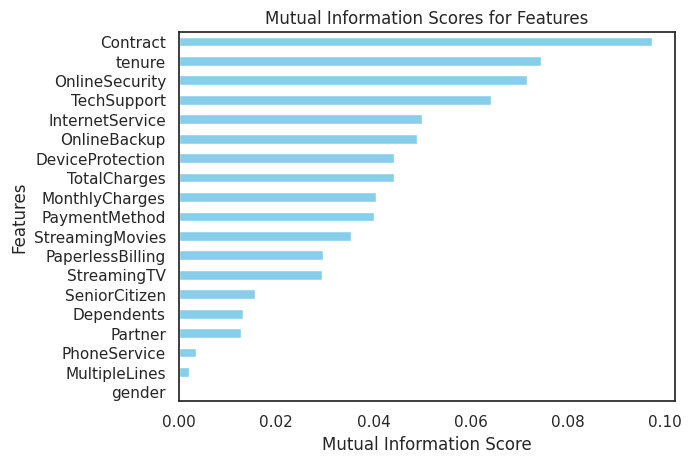

In [109]:
from sklearn.feature_selection import mutual_info_classif
# Separate features (X) and target (y)
X = df_encoded.drop(columns=['Churn'])  # Assuming 'Churn' is your target variable
y = df_encoded['Churn']
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=0)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
# Sort features by MI score in descending order
mi_df = mi_df.sort_values(by='MI Score', ascending=True)

# Plot the MI scores as a horizontal bar chart
plt.figure(figsize=(10, 8))
mi_df.plot(kind='barh', x='Feature', y='MI Score', legend=False, color='skyblue')
plt.title('Mutual Information Scores for Features')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.show()

We will remove the last three features, but retain `Partner`, `Dependents`, and `SeniorCitizen` as they display distinct distributions between churn and non-churn customers.

In [110]:
df.drop(columns = ['PhoneService', 'gender','MultipleLines','customerID'],inplace = True)

In [111]:
cat_features = ['SeniorCitizen', 'Partner', 'Dependents', 'InternetService', 
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                        'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 
                        'PaymentMethod'] 

numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
#Preprocessing pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
onehot = OneHotEncoder(handle_unknown='ignore')
scaler = StandardScaler()
preprocessor = ColumnTransformer(
    [
        ('OneHotEncoder',onehot,cat_features),
        ('Scaler',scaler,numeric_features)
    ]
)


## Modeling:
* Now it's time to train our models.First,we will try different classifiers.
* We will evaluate our models based on the accuracy and F1 score.

In [112]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)
X = df.drop(columns=['Churn'])
y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/tmp/ipykernel_30/307056645.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
/tmp/ipykernel_30/307056645.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [ ]:
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from lightgbm import LGBMClassifier
import xgboost as xgb


In [ ]:
# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Support Vector Classifier': SVC(probability=True, random_state=42),
    'LightGBM': LGBMClassifier(),
}
results = []
for name,clf in classifiers.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor), 
        ('classifier', clf) 
    ])
    pipeline.fit(X_train,y_train)
    y_test_pred = pipeline.predict(X_test)
    val_acc = accuracy_score(y_test,y_test_pred)
    val_f1 = f1_score(y_test,y_test_pred,average='weighted')
    results.append(
        {
            'classifier':name,
            'test accuracy': val_acc,
            'test f1 score': val_f1
        }
    )
# Create a DataFrame from the results
results_df = pd.DataFrame(results)

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151


In [115]:
results_df

,classifier,test accuracy,test f1 score
0,Random Forest,0.784648,0.776161
1,Gradient Boosting,0.785359,0.776242
2,AdaBoost,0.783937,0.776577
3,Logistic Regression,0.789623,0.784118
4,Support Vector Classifier,0.790334,0.780237
5,LightGBM,0.787491,0.780863
6,XGBoost,0.761905,0.753932


As we can see the SVC is the best performing model, know let's see the confusion matrix

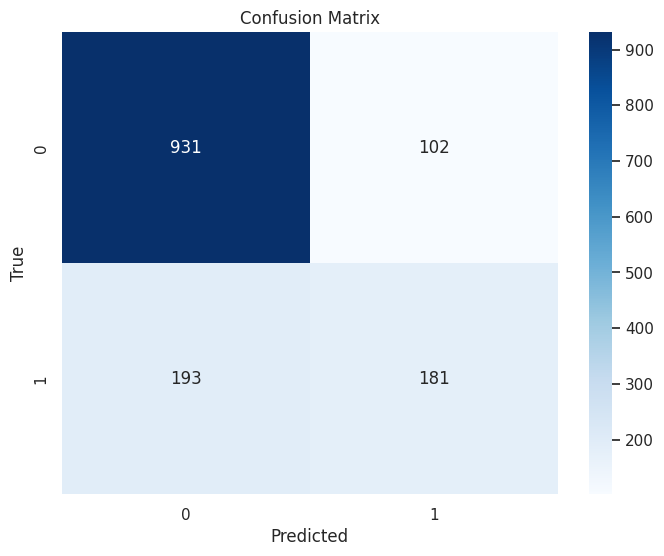

In [128]:
from sklearn.metrics import confusion_matrix
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

# Fit the pipeline with training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Conclusion

In this analysis, we conducted exploratory data analysis (EDA) to understand the features affecting customer churn. We identified key patterns in the data, selected the most informative features, and applied necessary transformations and scaling to optimize model performance. After training various classifiers, Support Vector Classifier (SVC) emerged as the best model, achieving an accuracy of `0.790` and an F1 score of `0.780`.
